## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results,on="Mouse ID")
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice.
len(combined_mouse_data["Mouse ID"].value_counts())

249

In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouseid_timepoint = combined_mouse_data[combined_mouse_data.duplicated()]
list(duplicated_mouseid_timepoint["Mouse ID"])

['g989']

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouseid_timepoint_data = combined_mouse_data[combined_mouse_data["Mouse ID"]=="g989"]
duplicated_mouseid_timepoint_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [123]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_drop = combined_mouse_data.set_index("Mouse ID")
mouse_data_drop = mouse_data_drop.drop("g989",axis=0)
mouse_data_drop

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [96]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = mouse_data_drop.reset_index()
len(clean_mouse_data["Mouse ID"].value_counts())

248

## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_data["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [98]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [124]:
tumor_volume_mean = drug_regimen_groups.mean()
#tumor_volume_mean

In [125]:
tumor_volume_median = drug_regimen_groups.median()
#tumor_volume_median

In [126]:
tumor_volume_var = drug_regimen_groups.var()
#tumor_volume_var

In [127]:
tumor_volume_std = drug_regimen_groups.std()
#tumor_volume_std

In [128]:
tumor_volume_sem = drug_regimen_groups.sem()
#tumor_volume_sem

In [104]:
tumor_volume_df = pd.DataFrame({"Tumor Volume Mean":tumor_volume_mean,
                              "Tumor Volume Median":tumor_volume_median,
                              "Tumor Volume Variance":tumor_volume_var,
                              "Tumor Volume Standard Deviation":tumor_volume_std,
                              "Tumor Volume SEM":tumor_volume_sem})
tumor_volume_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [130]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_groups_stats = drug_regimen_groups.agg(["mean", "median", "var", "std", "sem"])
drug_regimen_groups_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [118]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_regimen_groups = clean_mouse_data.groupby("Drug Regimen")
mice_drug_regimen_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [119]:
unique_mice_drug_regimen = (mice_drug_regimen_groups.agg({"Mouse ID":"nunique"})).rename(columns={"Mouse ID":"Unique Mice Counts"})
unique_mice_drug_regimen

,Unique Mice Counts
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


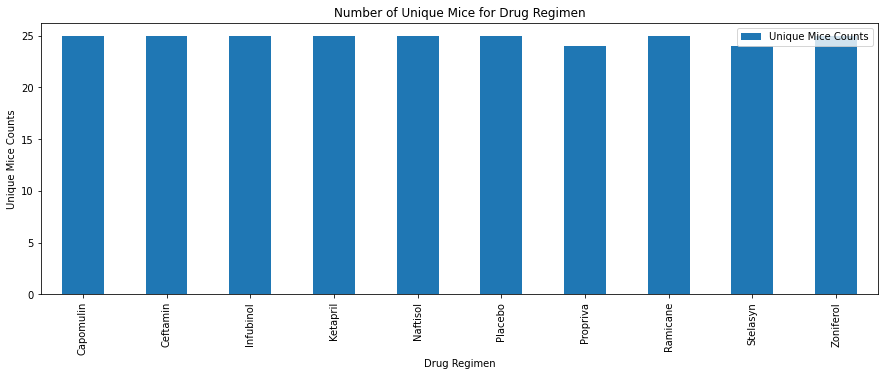

<Figure size 432x288 with 0 Axes>

In [120]:
unique_mice_drug_regimen.plot(kind="bar", figsize=(15,5), title="Number of Unique Mice for Drug Regimen")
plt.ylabel("Unique Mice Counts")
plt.show()
plt.tight_layout()

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(unique_mice_drug_regimen))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
x_ticklabels = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

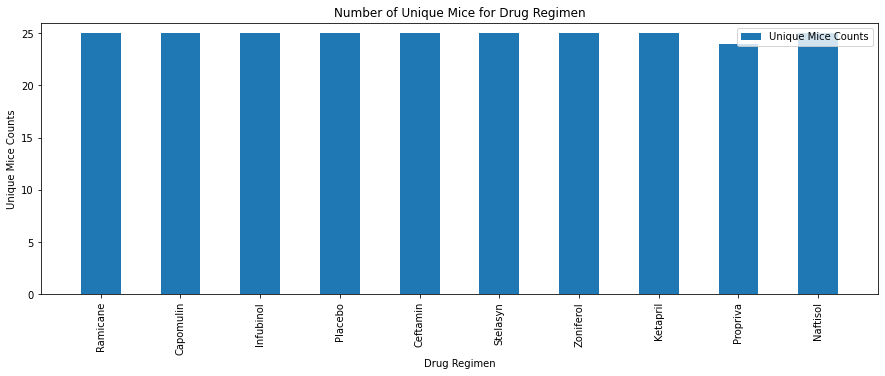

In [45]:
plt.figure(figsize=(15,5))
plt.bar(x_axis, unique_mice_drug_regimen["Unique Mice Counts"], align="center", width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_ticklabels, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(unique_mice_drug_regimen["Unique Mice Counts"])+1)
plt.title("Number of Unique Mice for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Counts")
plt.legend(unique_mice_drug_regimen, loc="upper right")

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_groups = clean_mouse_data.groupby("Sex")
mice_gender_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [33]:
unique_mice_gender = (mice_gender_groups.agg({"Mouse ID":"nunique"})).rename(columns={"Mouse ID":"Gender Counts"})
unique_mice_gender

,Gender Counts
Sex,
Female,124
Male,125


<AxesSubplot:title={'center':'Mice Gender Counts'}, ylabel='Gender Counts'>

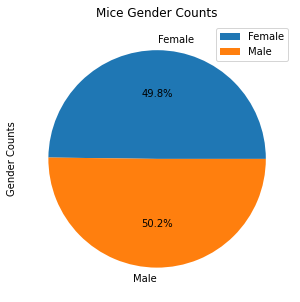

In [34]:
unique_mice_gender.plot.pie(y="Gender Counts", figsize=(5, 5), autopct="%1.1f%%", title="Mice Gender Counts")

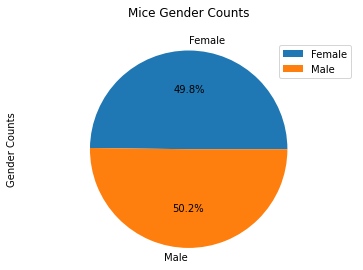

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
plt.pie(unique_mice_gender["Gender Counts"],labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Mice Gender Counts",fontsize=12, y=1.08)
plt.ylabel("Gender Counts")
plt.legend(labels, loc="upper right")

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [37]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
